
# Практическая работа №11
## Трёхмерные графики и анимация

Данный Jupyter Notebook содержит примеры и упражнения по теме "Трёхмерные графики и анимация".


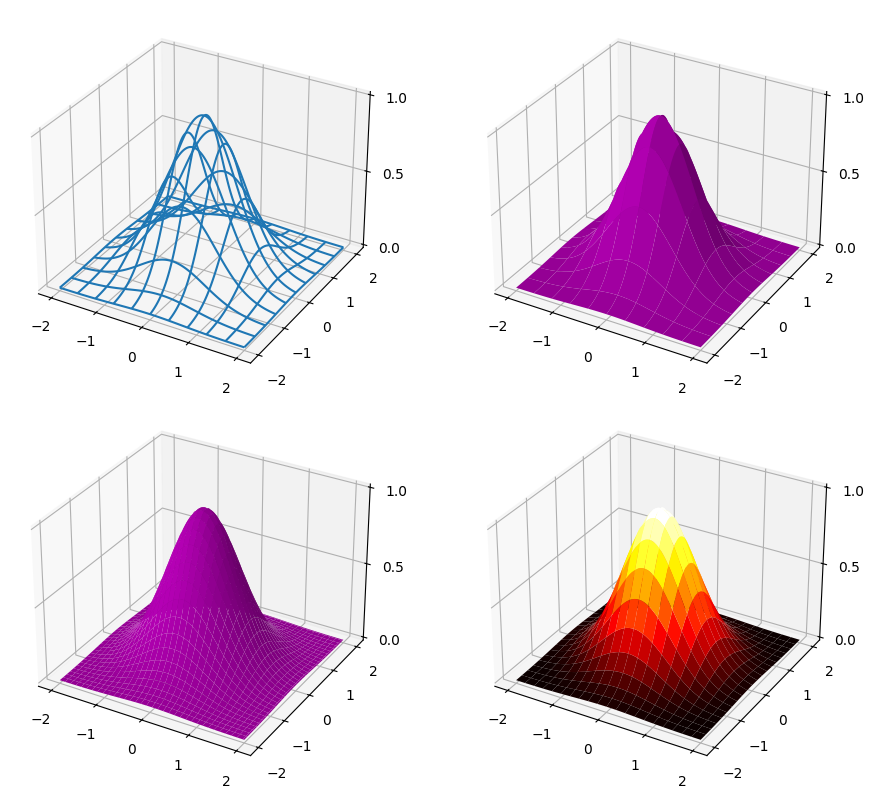

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Пример 1: Трёхмерные поверхностные диаграммы
L, n = 2, 400
x = np.linspace(-L, L, n)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

fig, ax = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': '3d'}, figsize=(10, 8))
ax[0, 0].plot_wireframe(X, Y, Z, rstride=40, cstride=40)
ax[0, 1].plot_surface(X, Y, Z, rstride=40, cstride=40, color='m')
ax[1, 0].plot_surface(X, Y, Z, rstride=12, cstride=12, color='m')
ax[1, 1].plot_surface(X, Y, Z, rstride=20, cstride=20, cmap=cm.hot)

for axes in ax.flatten():
    axes.set_xticks([-2, -1, 0, 1, 2])
    axes.set_yticks([-2, -1, 0, 1, 2])
    axes.set_zticks([0, 0.5, 1])

fig.tight_layout()
plt.show()


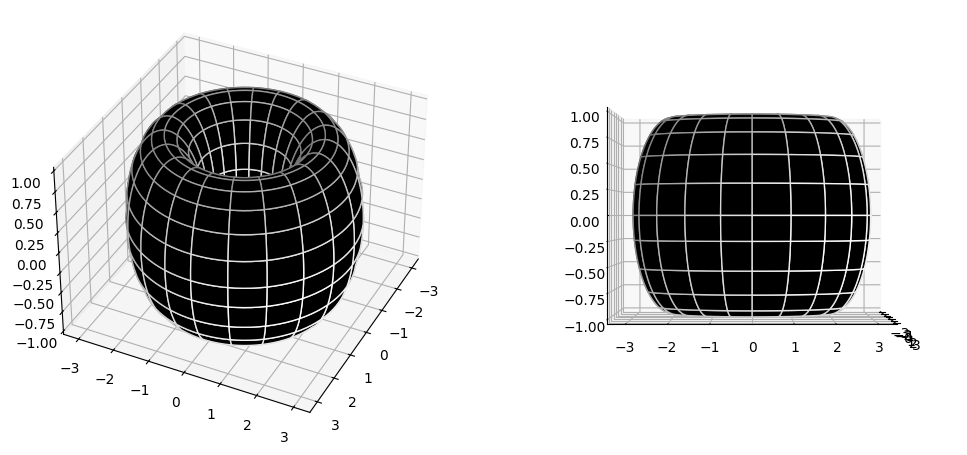

In [2]:

# Пример 2: Построение тора
n = 100
theta = np.linspace(0, 2 * np.pi, n)
phi = np.linspace(0, 2 * np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 2, 1
x = (c + a * np.cos(theta)) * np.cos(phi)
y = (c + a * np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax1.view_init(36, 26)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='k', edgecolors='w')
ax2.view_init(0, 0)
plt.show()


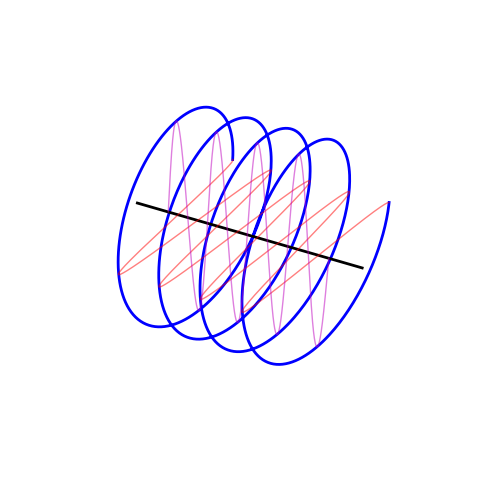

In [3]:

# Пример 3: Трёхмерная спираль
n = 1000
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, n)
x = theta
z = np.sin(theta)
y = np.cos(theta)

ax.plot(x, y, z, 'b', lw=2)
ax.plot((-theta_max * 0.2, theta_max * 1.2), (0, 0), (0, 0), color='k', lw=2)
ax.plot(x, y, 0, color='r', lw=1, alpha=0.5)
ax.plot(x, [0] * n, z, color='m', lw=1, alpha=0.5)
ax.set_axis_off()
plt.show()


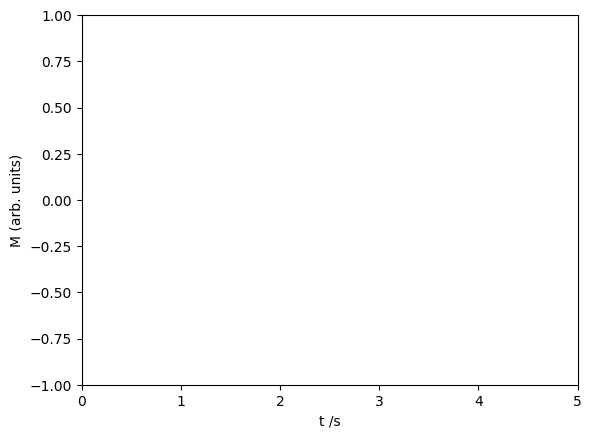

In [8]:

# Пример 4: Анимация затухающей синусоиды
import matplotlib.animation as animation

dt, tmax = 0.01, 5
f, alpha = 2.5, 1
t, M = [], []

fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set_xlim(0, tmax)
ax.set_ylim(-1, 1)
ax.set_xlabel('t /s')
ax.set_ylabel('M (arb. units)')

def animate(i):
    global t, M
    _t = i * dt
    t.append(_t)
    M.append(np.sin(2 * np.pi * f * _t) * np.exp(-alpha * _t))
    line.set_data(t, M)

interval, nframes = 1000 * dt, int(tmax / dt)
ani = animation.FuncAnimation(fig, animate, frames=nframes, repeat=False, interval=interval)
plt.show()


C:\Users\Danya\AppData\Local\Temp\ipykernel_25628\807181357.py:49: UserWarning: frames=<function get_pos at 0x0000018A563AB010> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, get_pos, blit=True, interval=interval, repeat=False, init_func=init)


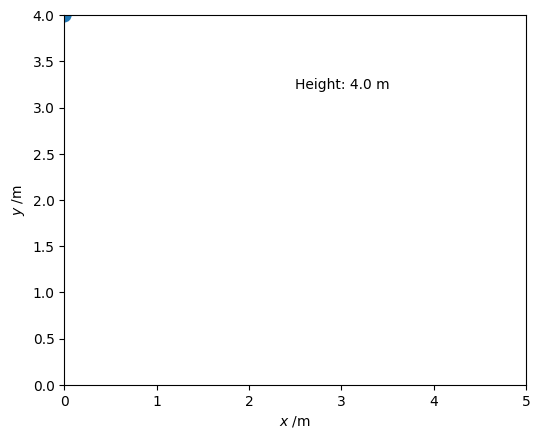

In [7]:

# Пример 5: Анимация прыгающего мяча
g = 9.81
XMAX = 5
cor = 0.65
dt = 0.005
x0, y0 = 0, 4
vx0, vy0 = 1, 0

def get_pos(t=0):
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < XMAX:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            y = 0
            vy = -vy * cor
        yield x, y

def init():
    ax.set_xlim(0, XMAX)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ /m')
    ax.set_ylabel('$y$ /m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

def animate(pos):
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

fig, ax = plt.subplots()
ax.set_aspect('equal')
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
height_text = ax.text(XMAX * 0.5, y0 * 0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

interval = 1000 * dt
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True, interval=interval, repeat=False, init_func=init)
plt.show()
